In [1]:
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
filter_mismatched_targets = True

Preprocessing (add missing layers to mudata)

In [12]:
mdata = md.read("/Users/ljb80/Downloads/1_mudata.h5mu")
count_threshold = 2
mdata["guide"].layers["guide_assignment"] = mdata["guide"].X >= count_threshold
mdata

/Users/ljb80/.virtualenvs/perturbo/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/Users/ljb80/.virtualenvs/perturbo/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 1219 × 30215
  obs:	'batch', 'cov1'
  2 modalities
    gene:	1219 x 25752
      obs:	'batch', 'cov1', 'batch_number', 'n_counts', 'log1p_n_genes_by_counts', 'total_gene_umis', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'percent_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'num_expressed_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
      var:	'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_chr', 'gene_start', 'gene_end'
    guide:	1219 x 4463
      obs:	'batch', 'cov1', 'num_expressed_guides', 'total_guide_umis'
      var:	'guide_id', 'spacer', 'targeting', 'type', 'guide_chr', 'guide_start', 'guide_end', 'strand', 'pam', 'intended_target_chr', 'intended_target_start', 'intended_target_end', 'gene_name', 'intended_target_name'
      uns:	'capture_method', 'moi'
      layers:	'guide_assignment'

In [13]:
gdata = mdata["guide"]
gdata.raw = gdata.copy()

gdata.var["intended_target_name"] = gdata.var[
    "intended_target_name"
].cat.add_categories("non-targeting")

gdata.var.loc[gdata.var["type"] == "non-targeting", "intended_target_name"] = (
    "non-targeting"
)
gdata.var

,guide_id,spacer,targeting,type,guide_chr,guide_start,guide_end,strand,pam,intended_target_chr,intended_target_start,intended_target_end,gene_name,intended_target_name
feature_id,,,,,,,,,,,,,,
AAAS_-_53715438.23-P1P2|GAGGACGAGTACGCGGTCCC,AAAS_-_53715438.23-P1P2,GAGGACGAGTACGCGGTCCC,True,targeting,chr12,53715438,53715458,-,NaN,chr12,53307456,53324864,AAAS,ENSG00000094914
AAMP_+_219134851.23-P1P2|GGTCGCGCAGAGCTGACTCT,AAMP_+_219134851.23-P1P2,GGTCGCGCAGAGCTGACTCT,True,targeting,chr2,219134851,219134871,+,NaN,chr2,218264129,218270178,AAMP,ENSG00000127837
AARS2_+_44281027.23-P1P2|GAGTGGCAGCTGCAGCCCGG,AARS2_+_44281027.23-P1P2,GAGTGGCAGCTGCAGCCCGG,True,targeting,chr6,44281027,44281047,+,NaN,chr6,44298731,44313347,AARS2,ENSG00000124608
AASDHPPT_+_105948405.23-P1P2|GCGGACCTCGCCGCTATCTC,AASDHPPT_+_105948405.23-P1P2,GCGGACCTCGCCGCTATCTC,True,targeting,chr11,105948405,105948425,+,NaN,chr11,106075501,106098699,AASDHPPT,ENSG00000149313
AATF_-_35306286.23-P1P2|GAGTGGCCGGTCCAGAGCTG,AATF_-_35306286.23-P1P2,GAGTGGCCGGTCCAGAGCTG,True,targeting,chr17,35306286,35306306,-,NaN,chr17,36948925,37056871,AATF,ENSG00000275700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
non-targeting_03589|GTTGGTTACCCCTCGATTGG,non-targeting_03589,GTTGGTTACCCCTCGATTGG,False,non-targeting,chr1,1,20,+,NaN,chr1,1,100,non-targeting,non-targeting
non-targeting_01632|GGCTCCAGTTCCGCATGCCA,non-targeting_01632,GGCTCCAGTTCCGCATGCCA,False,non-targeting,chr1,1,20,+,NaN,chr1,1,100,non-targeting,non-targeting
non-targeting_03703|GTGGCGGTGATCGCGAGGCA,non-targeting_03703,GTGGCGGTGATCGCGAGGCA,False,non-targeting,chr1,1,20,+,NaN,chr1,1,100,non-targeting,non-targeting


In [34]:
element_df = gdata.var.groupby("intended_target_name").nunique()
element_df

/var/folders/w9/llll0v7j02zdytwd43sshysm0000gp/T/ipykernel_2793/2098785739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  element_df = gdata.var.groupby("intended_target_name").nunique()


,guide_id,spacer,targeting,type,guide_chr,guide_start,guide_end,strand,pam,intended_target_chr,intended_target_start,intended_target_end,gene_name
intended_target_name,,,,,,,,,,,,,
ENSG00000001497,2,2,1,1,1,2,2,1,0,1,1,1,1
ENSG00000003509,2,2,1,1,1,2,2,2,0,1,1,1,1
ENSG00000004779,2,2,1,1,1,2,2,2,0,1,1,1,1
ENSG00000004897,2,2,1,1,1,2,2,1,0,1,1,1,1
ENSG00000005007,2,2,1,1,1,2,2,2,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283706,4,4,1,1,1,4,4,1,0,1,1,1,1
ENSG00000284770,2,2,1,1,1,2,2,2,0,1,1,1,1
ENSG00000285077,2,2,1,1,1,2,2,1,0,1,1,1,1


Text(0.5, 1.0, 'Number of guides per cell with >= 2 counts')

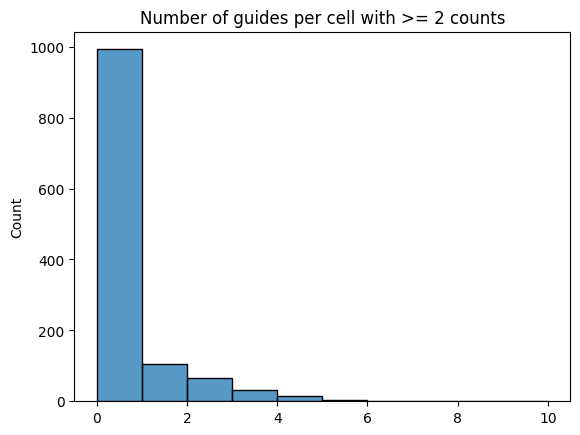

In [19]:
guides_per_cell = mdata["guide"].layers["guide_assignment"].sum(axis=1).A1
sns.histplot(guides_per_cell, binwidth=1)
plt.title(f"Number of guides per cell with >= {count_threshold} counts")

<Axes: title={'center': 'elements per cell'}, ylabel='Count'>

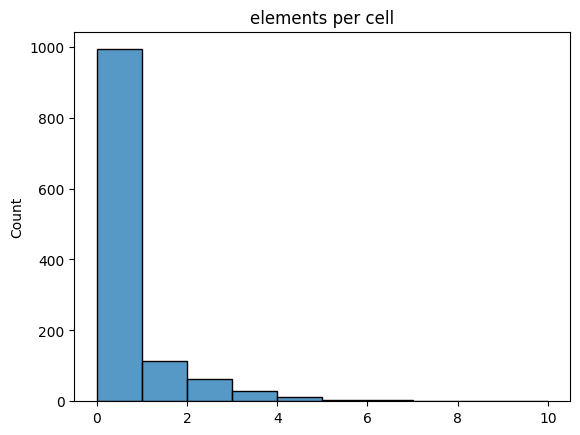

In [20]:
# create a guide by element matrix from gdata.var
guide_by_element = pd.get_dummies(gdata.var["intended_target_name"])
cell_by_element = (mdata["guide"].layers["guide_assignment"] @ guide_by_element) > 0
plt.title("elements per cell")
sns.histplot(cell_by_element.sum(axis=1), binwidth=1)


In [6]:
single_element_cells = cell_by_element.sum(axis=1) == 1
gdata_subset = gdata[single_element_cells, :]
gdata_subset.obs

,batch,cov1,num_expressed_guides,total_guide_umis
AGTAGCTCACCAAATC_0,1,1,14,506.0
AGTAGTCAGCTCACTA_0,1,1,23,32.0
CCCTCAACACGATTCA_0,1,1,5,79.0
ATCCACCCAGTTCCAA_0,1,1,7,99.0
TCATTACGTCTCTCTG_0,1,1,15,21.0
CGCGTGAAGTCGTCTA_0,1,1,9,15.0
GTTGTAGGTAGGATAT_0,1,1,13,19.0
ACCAACAAGATTAGAC_0,1,1,14,18.0
GTCACTCGTACCAGAG_0,1,1,1,6.0
TATCTGTTCACCTACC_0,1,1,11,17.0


In [7]:
if issparse(gdata_subset.X):
    cell_idx, guide_idx = gdata_subset.X.nonzero()
else:
    cell_idx, guide_idx = np.where(gdata_subset.X)

bc_df = pd.DataFrame({"cell_bc": gdata_subset.obs_names[cell_idx]})
var_df = gdata_subset.var.iloc[guide_idx].reset_index(drop=True)
bc_var_df = pd.concat([bc_df, var_df], axis=1)
bc_var_df


,cell_bc,guide_id,spacer,targeting,type,guide_chr,guide_start,guide_end,strand,pam,intended_target_chr,intended_target_start,intended_target_end,gene_name,intended_target_name
0,AGTAGCTCACCAAATC_0,ATP6V1B2_-_20054940.23-P1P2,GGGCGCTGCGGGCGATGCGG,True,targeting,chr8,20054940,20054960,-,NaN,chr8,20197381,20226819,ATP6V1B2,ENSG00000147416
1,AGTAGCTCACCAAATC_0,CCT6A_-_56119502.23-P1P2,GGCCACGCCGCGCCGGCTCT,True,targeting,chr7,56119502,56119522,-,NaN,chr7,56051685,56063989,CCT6A,ENSG00000146731
2,AGTAGCTCACCAAATC_0,GPS1_+_80010011.23-P1P2,GTCGCAGCGCGCAGCCACGG,True,targeting,chr17,80010011,80010031,+,NaN,chr17,82050691,82057470,GPS1,ENSG00000169727
3,AGTAGCTCACCAAATC_0,MTBP_-_121457707.23-P1P2,GAGTTGGGGGGTGATCTCTG,True,targeting,chr8,121457707,121457727,-,NaN,chr8,120445400,120542133,MTBP,ENSG00000172167
4,AGTAGCTCACCAAATC_0,RBM39_+_34330131.23-P1P2,GAGCAGCGGCCGCCATTTCA,True,targeting,chr20,34330131,34330151,+,NaN,chr20,35701347,35742312,RBM39,ENSG00000131051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,ACCACAACAAGTATCC_0,RPLP2_+_809986.23-P1P2,GAGTCTCACGCGTGCGACCT,True,targeting,chr11,809986,810006,+,NaN,chr11,809965,812880,RPLP2,ENSG00000177600
457,ACCACAACAAGTATCC_0,RSL1D1_+_11945362.23-P1,GCGAGGTGGAAACAAGATGG,True,targeting,chr16,11945362,11945382,+,NaN,chr16,11833850,11851580,RSL1D1,ENSG00000171490
458,ACCACAACAAGTATCC_0,SRSF10_-_24306749.23-P1P2,GCGCAGGTAGCGGGACATGG,True,targeting,chr1,24306749,24306769,-,NaN,chr1,23964347,23980927,SRSF10,ENSG00000188529
459,ACCACAACAAGTATCC_0,SYF2_+_25558954.23-P1P2,GGAAGAGAGAAAGGTTGTGA,True,targeting,chr1,25558954,25558974,+,NaN,chr1,25222276,25232502,SYF2,ENSG00000117614


In [8]:
# aggregate the guide_id and spacer by joining with "|", and for the rest of the columns use the first value
bc_var_df_grouped = bc_var_df.groupby(
    [
        "cell_bc",
        "intended_target_name",
        "intended_target_chr",
        "intended_target_start",
        "intended_target_end",
        "gene_name",
    ],
    observed=True,
)
bc_var_df_grouped["guide_id"].value_counts().sort_values()

cell_bc             intended_target_name  intended_target_chr  intended_target_start  intended_target_end  gene_name  guide_id                   
ACAAGCTTCCATGAGT_0  ENSG00000064313       chr8                 119730774              119832841            TAF2       TAF2_-_120845040.23-P1P2       1
GTGTCCTTCTTCACGC_0  ENSG00000152404       chr11                107326345              107457844            CWF19L2    CWF19L2_+_107328479.23-P1P2    1
                    ENSG00000149084       chr11                43680680               43856617             HSD17B12   HSD17B12_+_43702297.23-P1P2    1
                    ENSG00000127184       chr5                 86617928               86620962             COX7C      COX7C_+_85913816.23-P1P2       1
                    ENSG00000117748       chr1                 27891524               27914746             RPA2       RPA2_-_28241061.23-P1P2        1
                                                                                                   

In [30]:
guide_spacer_grouped = bc_var_df_grouped.agg(
    {
        "guide_id": lambda x: "|".join(x.tolist()),
        "spacer": lambda x: "|".join(x.tolist()),
    },
)

rest_grouped = bc_var_df_grouped[
    ["targeting", "type", "guide_chr", "guide_start", "guide_end", "strand", "pam"]
].agg("first")

cell_guide_deduped = (
    pd.concat([guide_spacer_grouped, rest_grouped], axis=1)
    .reset_index()
    .set_index("cell_bc")
)
cell_guide_deduped

,intended_target_name,intended_target_chr,intended_target_start,intended_target_end,gene_name,guide_id,spacer,targeting,type,guide_chr,guide_start,guide_end,strand,pam
cell_bc,,,,,,,,,,,,,,
ACAAGCTTCCATGAGT_0,ENSG00000064313,chr8,119730774,119832841,TAF2,TAF2_-_120845040.23-P1P2,GGAGATGCTCCTCTCCGCAA,True,targeting,chr8,120845040,120845060,-,NaN
ACAAGCTTCCATGAGT_0,ENSG00000100142,chr22,37952607,38041915,POLR2F,POLR2F_-_38349783.23-P1P2,GGGGCGCAGCGGGGTCGCTG,True,targeting,chr22,38349783,38349803,-,NaN
ACAAGCTTCCATGAGT_0,ENSG00000104980,chr19,7926718,7943667,TIMM44,TIMM44_-_8008522.23-P1P2,GCGGCACCAGCCACTCCGCA,True,targeting,chr19,8008522,8008542,-,NaN
ACAAGCTTCCATGAGT_0,ENSG00000109475,chr4,108620569,108630412,RPL34,RPL34_-_109541761.23-P1P2,GGGGACGTTGTCTGCAGGTA,True,targeting,chr4,109541761,109541781,-,NaN
ACAAGCTTCCATGAGT_0,ENSG00000109805,chr4,17810979,17844865,NCAPG,NCAPG_-_17812684.23-P1P2,GGCGCGGGCAGGACTCGTCC,True,targeting,chr4,17812684,17812704,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAATCCGTCTCGGAC_0,ENSG00000186468,chr5,82273320,82278396,RPS23,RPS23_+_81574137.23-P1P2,GCCCGTGGCGCCGACAGGAT,True,targeting,chr5,81574137,81574157,+,NaN
TTAATCCGTCTCGGAC_0,ENSG00000197728,chr12,56041351,56044697,RPS26,RPS26_-_56435953.23-P1P2,GCCGGTCCGTGCCTCCAAGA,True,targeting,chr12,56435953,56435973,-,NaN
TTAATCCGTCTCGGAC_0,ENSG00000197756,chr2,216498825,216579180,RPL37A,RPL37A_-_217363600.23-P1P2,GGACCTAGGTCGCGGCGACA,True,targeting,chr2,217363600,217363620,-,NaN


In [31]:
guide_dummies = pd.get_dummies(cell_guide_deduped["guide_id"], sparse=True)
md.AnnData(guide_dummies, obs = mdata["guide"].obs.loc[guide_dummies.index])

/Users/ljb80/.virtualenvs/perturbo/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 442 × 279
    obs: 'batch', 'cov1', 'num_expressed_guides', 'total_guide_umis'